In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RidgeCV
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import data set
tdf = pd.read_csv('C:/Users/josep/documents/winston/train.csv')

In [3]:
# review df info & shape
tdf.info()
tdf.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 39999
Columns: 211 entries, Id to Weight_Daily
dtypes: float64(209), int64(2)
memory usage: 64.7 MB


(40000, 211)

In [4]:
# replace blanks w/ zeros, not sure if this is necessary
tdf0 = tdf.fillna(value=0)
tdf0.columns

Index([u'Id', u'Feature_1', u'Feature_2', u'Feature_3', u'Feature_4',
       u'Feature_5', u'Feature_6', u'Feature_7', u'Feature_8', u'Feature_9',
       ...
       u'Ret_175', u'Ret_176', u'Ret_177', u'Ret_178', u'Ret_179', u'Ret_180',
       u'Ret_PlusOne', u'Ret_PlusTwo', u'Weight_Intraday', u'Weight_Daily'],
      dtype='object', length=211)

In [6]:
# create seperate of df of features
df_features = tdf0.iloc[:, 1:28]
df_features.columns

Index([u'Feature_1', u'Feature_2', u'Feature_3', u'Feature_4', u'Feature_5',
       u'Feature_6', u'Feature_7', u'Feature_8', u'Feature_9', u'Feature_10',
       u'Feature_11', u'Feature_12', u'Feature_13', u'Feature_14',
       u'Feature_15', u'Feature_16', u'Feature_17', u'Feature_18',
       u'Feature_19', u'Feature_20', u'Feature_21', u'Feature_22',
       u'Feature_23', u'Feature_24', u'Feature_25', u'Ret_MinusTwo',
       u'Ret_MinusOne'],
      dtype='object')

C:\Users\josep\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


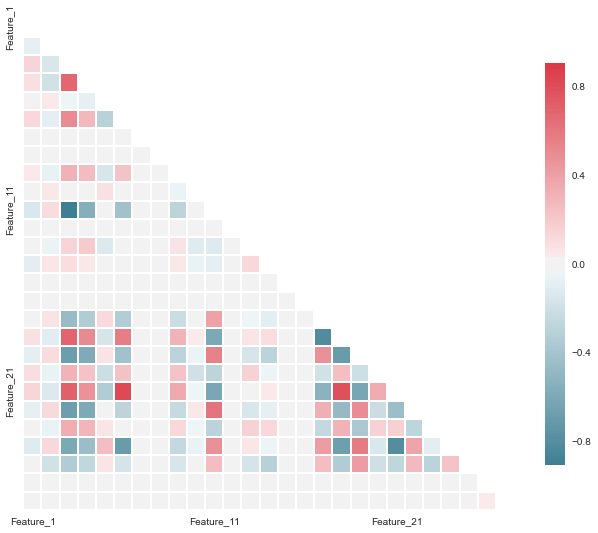

In [7]:
# correlation of features
sns.set(style="white")
corr = df_features.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=10, yticklabels=10,
            linewidths=.5, cbar_kws={"shrink": 0.8}, ax=ax)

In [11]:
df_features.corr()['Ret_MinusTwo'].order(ascending=False)

C:\Users\josep\Anaconda\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


Ret_MinusTwo    1.000000
Ret_MinusOne    0.041609
Feature_20      0.027358
Feature_6       0.009513
Feature_18      0.007927
Feature_12      0.007498
Feature_21      0.006131
Feature_22      0.005272
Feature_2       0.003246
Feature_8       0.002575
Feature_1       0.002356
Feature_25      0.001715
Feature_10      0.001558
Feature_14      0.001398
Feature_24      0.001102
Feature_4       0.000378
Feature_11      0.000215
Feature_23     -0.000052
Feature_16     -0.000132
Feature_15     -0.000782
Feature_9      -0.002522
Feature_3      -0.003759
Feature_19     -0.003771
Feature_5      -0.006809
Feature_17     -0.010090
Feature_13     -0.016573
Feature_7      -0.020485
Name: Ret_MinusTwo, dtype: float64

In [12]:
df_features.corr()['Ret_MinusOne'].order(ascending=False)

C:\Users\josep\Anaconda\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


Ret_MinusOne    1.000000
Ret_MinusTwo    0.041609
Feature_16      0.032606
Feature_14      0.023691
Feature_13      0.022273
Feature_20      0.019291
Feature_15      0.011651
Feature_4       0.009792
Feature_3       0.006571
Feature_24      0.004266
Feature_21      0.002894
Feature_23      0.002817
Feature_1       0.002131
Feature_17      0.000320
Feature_2      -0.000129
Feature_18     -0.000160
Feature_6      -0.000558
Feature_9      -0.005009
Feature_11     -0.005417
Feature_8      -0.005684
Feature_10     -0.006315
Feature_5      -0.006562
Feature_12     -0.007372
Feature_22     -0.009005
Feature_7      -0.011394
Feature_25     -0.013835
Feature_19     -0.015150
Name: Ret_MinusOne, dtype: float64

In [ ]:
df_intra = tdf0.iloc[:, 28:207]
df_intra.info()